## Instructions for the datasets:

### File name codes:
'\_norm\_bhps': dataset for normalized BHPs <br>
'\_well\_loc': dataset for normalized well locations <br>
'\_train': dataset for pressure (normalized) and saturation <br>

### Old dataset list:
4W_BHP: <br>

    data_dir = '/data/cees/zjin/lstm_rom/datasets/4W_BHP/' <br> 
    data_dir = '/data3/Astro/lstm_rom/explore/data/4W_BHP/' <br>
    
    Training: 100 runs, 2 injectors, 2 producers.
                10 different well locations, each with 10 varying BHP profiles (10x10=100)
                Well location start with 4 wells in the corner, then moving to the middle
    Simulation files are in: /data/cees/zjin/lstm_rom/sim_runs/case2_4w_bhp/
    
9W_BHP: <br>

    data_dir = '/data/cees/zjin/lstm_rom/datasets/9W_BHP/' <br> 
    data_dir = '/data3/Astro/lstm_rom/explore/data/9W_BHP/' <br>
    
    Training: 400 runs, 4 injectors, 5 producers. First 100 runs with high BHP on well 1, and lower BHP on the rest. 
                Same for the following 100, and 100 ...
                All wells with BHP control.
                Fixed well locations.
    Simulation files are in: /data/cees/zjin/lstm_rom/sim_runs/case3_9w_bhp/run_sims_single_out.ipynb

    
9W_BHP_RATE: <br>

    data_dir = '/data/cees/zjin/lstm_rom/datasets/9W_BHP/' <br> 
    data_dir = '/data3/Astro/lstm_rom/explore/data/9W_BHP_RATE/' <br>
    
    Training: 400 runs. Same as 9W_BHP. But all 4 injectors are with rate control
                Fixed well locations.
    Simulation files are in: /data/cees/zjin/lstm_rom/sim_runs/case4_9w_bhp_rate/
    
### Additional datasets

(1): <br>

    data_dir = '/data3/Astro/lstm_rom/explore/data/9w_bhp_wl/' <br>
    filename = 'pres_sat.mat' full-order pressure and saturation <br>
    Training: 100 runs with varying BHPs and well locations. <br>
    Format of the file is a bit different (modified by Yimin). (36000000,), which is 100 runs x 100 steps x 3600 grids <br>
    Original sim file in /data/cees/zjin/lstm_rom/sim_runs/case3_9w_bhp_rate/run_sims.ipynb <br>

(2):<br>

### New datasets
case_name: 9w_bhp or 9w_bhp_rate <br>
case_suffix: single_out, fix_wl <br>
rel_x means realization number <br>
model_suffix: no_p <br>
    

In [52]:
import h5py
import numpy as np

import matplotlib.pyplot as plt
plt.set_cmap('jet')

<Figure size 432x288 with 0 Axes>

In [3]:
# data_dir = '/data/cees/zjin/lstm_rom/datasets/9W_BHP/'
# data_dir = '/data/cees/zjin/lstm_rom/datasets/9W_BHP_RATE/'
data_dir = '/data/cees/zjin/lstm_rom/datasets/9W_MS_BHP_RATE/'

# case_name = '9w_bhp'
# case_name = '9w_bhp_rate'
case_name = '9w_ms_bhp_rate'

state_file = case_name + '_train_n_400_full'
ctrl_file = case_name + '_norm_bhps_n_400'

# case_suffix = '_single_out_rel_3'
# case_suffix = '_single_out_rel_2'
# case_suffix = '_single_out_rel_1'
case_suffix = '_fix_wl_rel_1'
# case_suffix = '_fix_wl_rel_2'
train_suffix = '_with_p'

state_data = state_file + case_suffix + '.mat'
ctrl_data = ctrl_file + case_suffix + '.mat'

In [4]:
hf_r = h5py.File(data_dir + state_data, 'r')
sat = np.array(hf_r.get('sat'))
pres = np.array(hf_r.get('pres'))
hf_r.close()

In [5]:
print(sat.shape)
sat = sat.T.reshape((400, 101, 3600))
pres = pres.T.reshape(400,101,3600)
print("sat shape:{}".format(sat.shape))
print("pres shape:{}".format(pres.shape))

(3600, 40400)
sat shape:(400, 101, 3600)
pres shape:(400, 101, 3600)


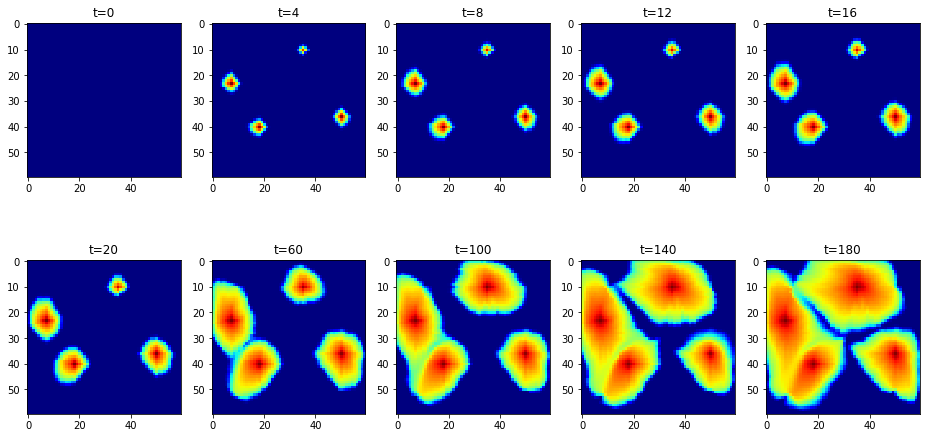

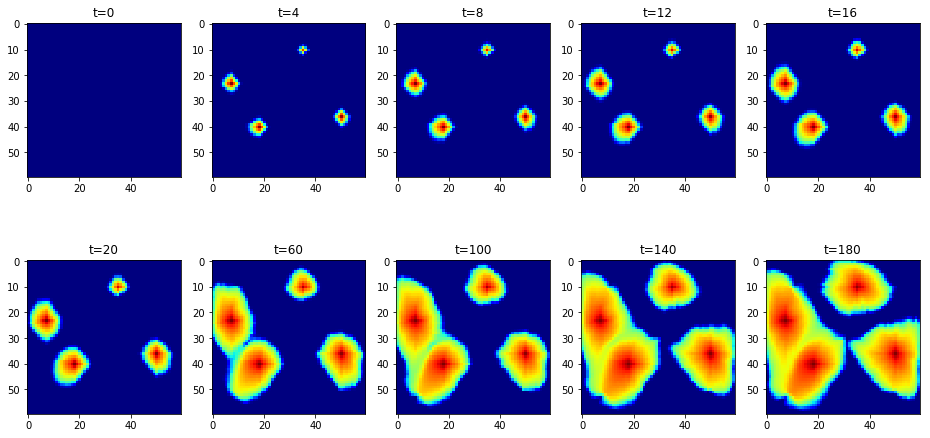

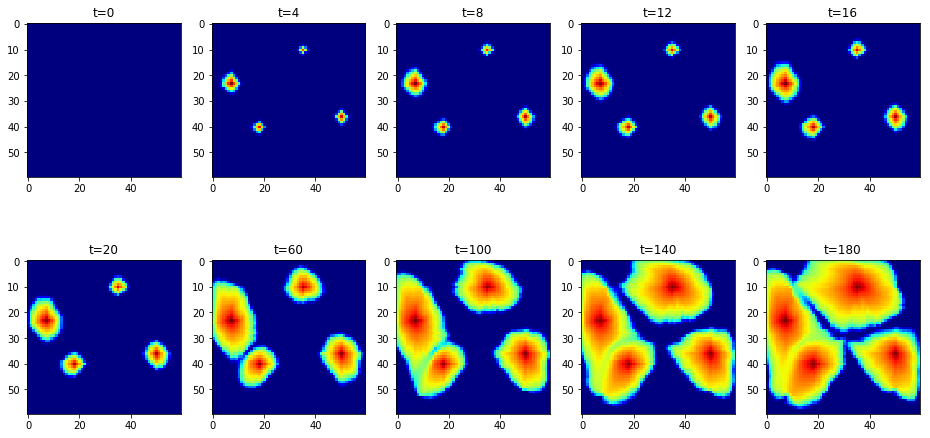

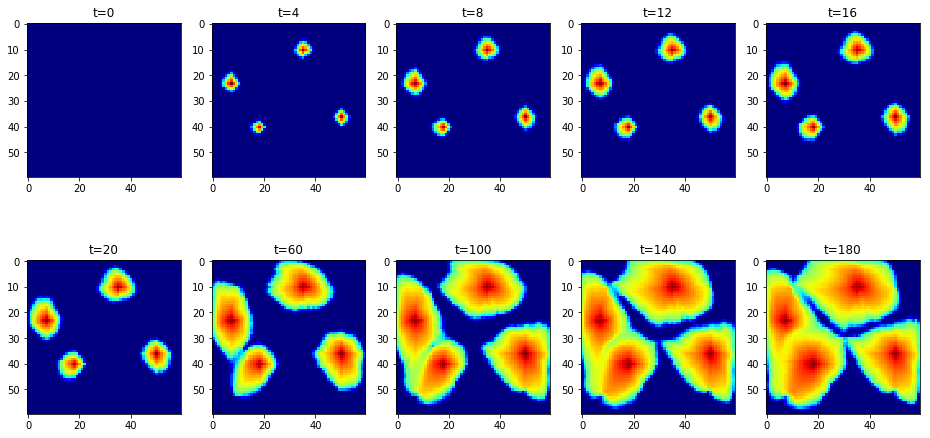

In [6]:
for k in range(4):
    plt.figure(figsize=(16,8))
    for t in range(5):
        plt.subplot(2,5, t+1)
        plt.imshow(sat[100*k+1, t*2, :].reshape((60,60)))
        plt.title("t=%d"%(t*2*2))
    for t in range(5):
        plt.subplot(2,5, t+6)
        plt.imshow(sat[100*k+1, 20*t+10, :].reshape((60,60)))
        plt.title("t=%d"%((t*20+10)*2))
plt.show()

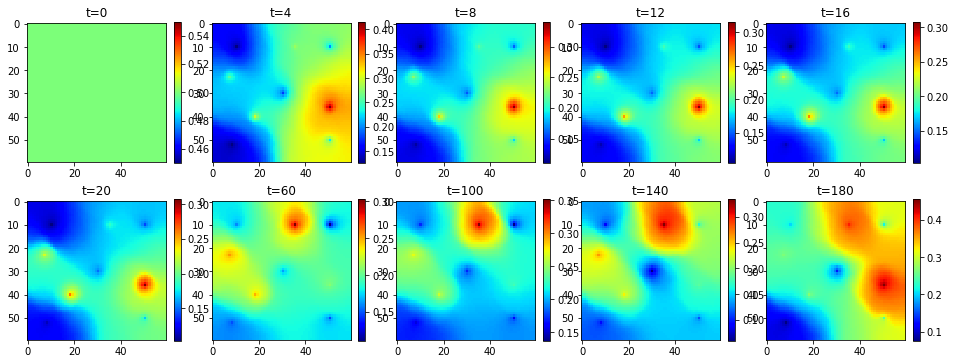

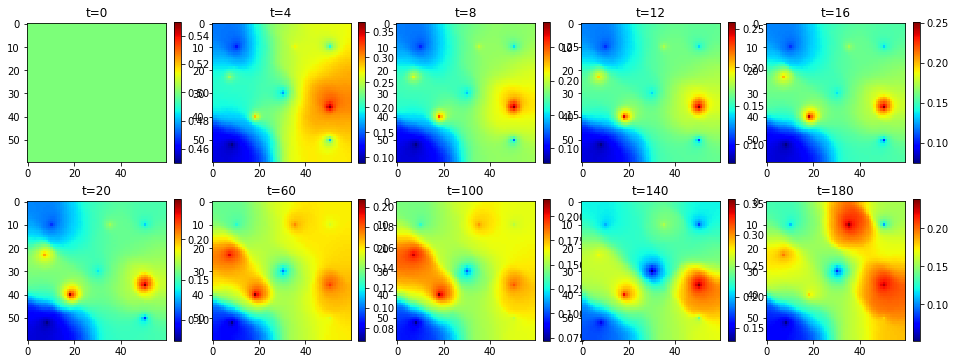

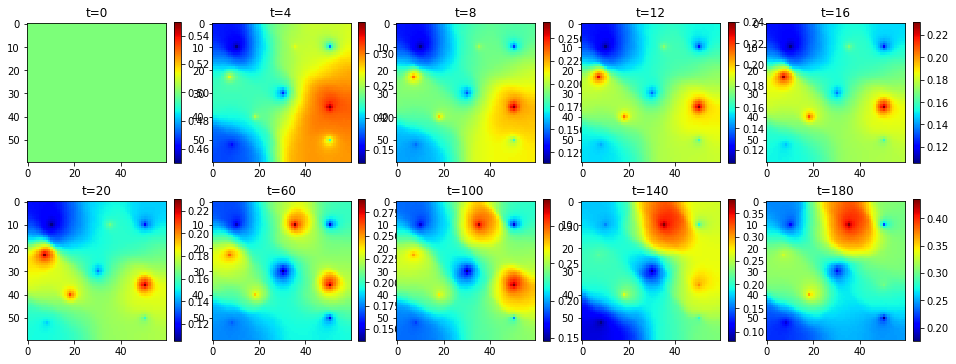

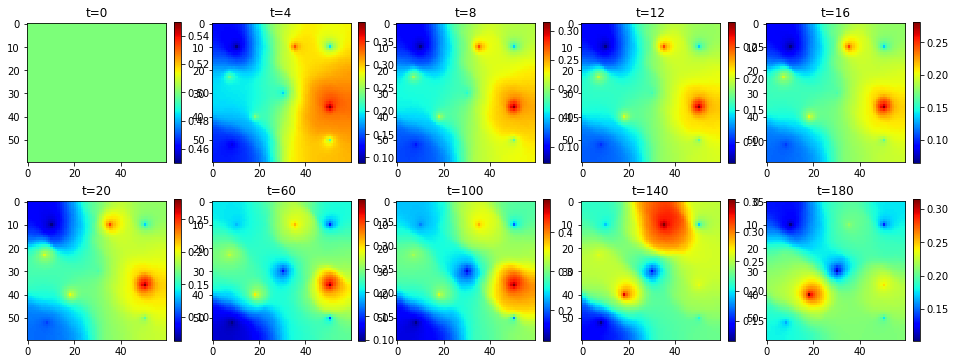

In [7]:
for k in range(4):
    plt.figure(figsize=(16,6))
    for t in range(5):
        plt.subplot(2,5, t+1)
        plt.imshow(pres[100*k+1, t*2, :].reshape((60,60)))
        plt.title("t=%d"%(t*2*2))
        plt.colorbar(fraction=0.046)
    for t in range(5):
        plt.subplot(2,5, t+6)
        plt.imshow(pres[100*k+1, 20*t+10, :].reshape((60,60)))
        plt.title("t=%d"%((t*20+10)*2))
        plt.colorbar(fraction=0.046)
plt.show()

In [8]:
dt = 10
t_interval = 5

In [54]:
indt = np.append(np.array([0,2,4,6,8]),np.linspace(10, (100-dt), (100-dt)/t_interval-1).astype(int))
# quick modification
indt[[8,13,18]] += 1
indt1 = (indt + dt).astype(int)

print(indt)
print(indt1)

sat_t = sat[:, indt,:]
sat_t1 = sat[:, indt1, :]

pres_t = pres[:, indt,:]
pres_t1 = pres[:, indt1,:]

/data3/Astro/global/miniconda3/envs/tf-1.10.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


[ 0  2  4  6  8 10 15 20 26 30 35 40 45 51 55 60 65 70 76 80 85 90]
[ 10  12  14  16  18  20  25  30  36  40  45  50  55  61  65  70  75  80
  86  90  95 100]


Can not cross 25, 50, 75 because the contorl changed? 

In [55]:
print(sat_t1.shape)
print(pres_t1.shape)

num_t = sat_t.shape[1]

(400, 22, 3600)
(400, 22, 3600)


## Read control data

In [12]:
hf_r = h5py.File(data_dir + ctrl_data)
bhp0 = np.array(hf_r.get('bhp'))
rate0 = np.array(hf_r.get('rate'))
hf_r.close()

In [13]:
print(bhp0.shape)
print(rate0.shape)

(400, 20)
(400, 16)


In [14]:
print("bhp={}".format(bhp0))
print("rate={}".format(rate0))

bhp=[[0.03454727 0.10718536 0.06073336 ... 0.06574982 0.05077895 0.06748634]
 [0.07244344 0.11540607 0.00563182 ... 0.10054077 0.04514044 0.11194157]
 [0.10237475 0.04475532 0.14644187 ... 0.02496704 0.02723549 0.1281144 ]
 ...
 [0.05629493 0.08521943 0.00021741 ... 0.04375369 0.13307446 0.03876073]
 [0.15029796 0.08966906 0.13226865 ... 0.11010179 0.05209007 0.09100619]
 [0.0787671  0.02497835 0.09037017 ... 0.01985555 0.14872977 0.16149991]]
rate=[[0.48425979 0.24175548 0.62153033 ... 0.76337996 0.91561655 0.75073687]
 [0.81607569 0.49297916 0.92424408 ... 0.03044185 0.0062538  0.76582752]
 [0.77540749 0.57738261 0.61204669 ... 0.95059039 0.44768941 0.26893307]
 ...
 [0.25916448 0.51756002 0.28076784 ... 0.80378734 0.0407978  0.06305234]
 [0.3582045  0.68622811 0.27416746 ... 0.5734989  0.25580729 0.33184089]
 [0.03293733 0.49574901 0.05139365 ... 0.47750556 0.30799065 0.98906974]]


In [15]:
bhp = np.concatenate((bhp0,rate0),axis=1)
print(bhp.shape)

(400, 36)


In [16]:
print("Prod BHP max and min:")
print(bhp[:,:5].max().max())
print(bhp[:,:5].min().min())
print("Inj rate max and min:")
print(bhp[:,5:].max().max())
print(bhp[:,5:].min().min())


Prod BHP max and min:
0.1665733279974875
1.4405980140742953e-05
Inj rate max and min:
0.9998146230932292
9.929824820619616e-06


In [19]:
# not sure about this
# bhp -= 0.45

In [16]:
for k in range(4):
    print(bhp[100*k,:])
    print(bhp[100*k+1,:])

[0.12603923 0.16606464 0.14332627 0.02125681 0.09291452 0.80148434
 0.42208784 0.23245932 0.36719808]
[0.13617983 0.1439765  0.06950047 0.10693791 0.10531575 0.54835031
 0.61391753 0.82478031 0.11559282]
[0.12653493 0.08339082 0.01584138 0.09562382 0.03302848 0.6010118
 0.96454326 0.16234796 0.64236527]
[4.14262952e-04 1.49357121e-01 2.89191023e-02 1.43111041e-01
 2.19757479e-02 4.45394093e-01 5.79433684e-02 7.85623926e-01
 3.79767497e-01]
[0.03825938 0.16319297 0.04385313 0.11208911 0.06350555 0.42859832
 0.50459236 0.82290679 0.73840042]
[0.02760464 0.15999552 0.09068349 0.13010044 0.08722158 0.20733327
 0.51716867 0.53371723 0.77842162]
[0.15937616 0.07710692 0.00859073 0.0146534  0.0917615  0.53534166
 0.05346416 0.06141495 0.46416115]
[0.02951532 0.02377637 0.10098291 0.0589111  0.03801925 0.07252316
 0.45041314 0.85662743 0.60604093]


In [56]:
print(indt)
print(indt1)

[ 0  2  4  6  8 10 15 20 26 30 35 40 45 51 55 60 65 70 76 80 85 90]
[ 10  12  14  16  18  20  25  30  36  40  45  50  55  61  65  70  75  80
  86  90  95 100]


In [57]:
tmp = np.zeros_like(indt)
print(tmp)
for i in range(len(tmp)):
    if indt[i] <= 25:
        tmp[i] = 0
    elif indt[i] <= 50:
        tmp[i] = 1
    elif indt[i] <= 75:
        tmp[i] = 2
    else:
        tmp[i] = 3
print(tmp)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3]


In [58]:
tmp1 = np.zeros_like(indt1)
print(tmp1)
for i in range(len(tmp1)):
    if indt1[i] <= 25:
        tmp1[i] = 0
    elif indt1[i] <= 50:
        tmp1[i] = 1
    elif indt1[i] <= 75:
        tmp1[i] = 2
    else:
        tmp1[i] = 3
print(tmp1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3]


In [60]:
print(bhp.shape)
bhp_a = bhp.reshape(400, 9, 4)
bhp_tt = bhp_a[:,:, tmp]
bhp_tt1 = bhp_a[:,:, tmp1]
print(bhp_tt.shape)
print(bhp_tt1.shape)
bhp_tt0 = np.concatenate((bhp_tt, bhp_tt1), axis=1)
bhp_t = np.swapaxes(bhp_tt0,1,2)
print(bhp_t.shape)

(400, 36)
(400, 9, 22)
(400, 9, 22)
(400, 22, 18)


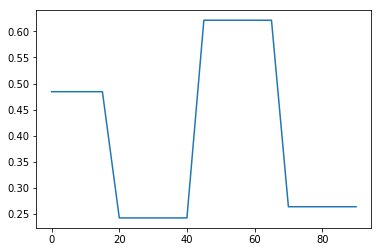

In [63]:
plt.plot(indt, bhp_t[0,:,14])

In [64]:
print(sat_t.shape)
print(pres_t.shape)

(400, 22, 3600)
(400, 22, 3600)


In [66]:
num_run_per_case = 75
sat_t_train = np.zeros((num_run_per_case*4, num_t, 3600))
sat_t1_train = np.zeros((num_run_per_case*4, num_t, 3600))
bhp_train = np.zeros((num_run_per_case*4, num_t, 9*2))

pres_t_train = np.zeros((num_run_per_case*4, num_t, 3600))
pres_t1_train = np.zeros((num_run_per_case*4, num_t, 3600))


num_run_eval = 100 - num_run_per_case
sat_t_eval = np.zeros((num_run_eval*4, num_t, 3600))
sat_t1_eval = np.zeros((num_run_eval*4, num_t, 3600))
bhp_eval = np.zeros((num_run_eval*4, num_t, 9*2))

pres_t_eval = np.zeros((num_run_eval*4, num_t, 3600))
pres_t1_eval = np.zeros((num_run_eval*4, num_t, 3600))


for k in range(4):
    ind0 = k * num_run_per_case
    sat_t_train[ind0:ind0+num_run_per_case,...] = sat_t[k*100:k*100+num_run_per_case, :, :]
    sat_t1_train[ind0:ind0+num_run_per_case,...] = sat_t1[k*100:k*100+num_run_per_case, :, :]
    pres_t_train[ind0:ind0+num_run_per_case,...] = pres_t[k*100:k*100+num_run_per_case, :, :]
    pres_t1_train[ind0:ind0+num_run_per_case,...] = pres_t1[k*100:k*100+num_run_per_case, :, :]
    bhp_train[ind0:ind0+num_run_per_case,...] = bhp_t[k*100: k*100+num_run_per_case, :, :]
    # Eval set
    ind1 = k*num_run_eval
    sat_t_eval[ind1:ind1+num_run_eval,...] = sat_t[k*100+num_run_per_case:k*100+100, :, :]
    sat_t1_eval[ind1:ind1+num_run_eval,...] = sat_t1[k*100+num_run_per_case:k*100+100, :, :]
    pres_t_eval[ind1:ind1+num_run_eval,...] = pres_t[k*100+num_run_per_case:k*100+100, :, :]
    pres_t1_eval[ind1:ind1+num_run_eval,...] = pres_t1[k*100+num_run_per_case:k*100+100, :, :]
    bhp_eval[ind1:ind1+num_run_eval,...] = bhp_t[k*100+num_run_per_case: k*100+100, :, :]

In [67]:
print(sat_t_train.shape)
print(sat_t1_train.shape)
print(pres_t_train.shape)
print(pres_t1_train.shape)
print(bhp_train.shape)
print(sat_t_eval.shape)
print(sat_t1_eval.shape)
print(pres_t_eval.shape)
print(pres_t1_eval.shape)
print(bhp_eval.shape)

(300, 22, 3600)
(300, 22, 3600)
(300, 22, 3600)
(300, 22, 3600)
(300, 22, 18)
(100, 22, 3600)
(100, 22, 3600)
(100, 22, 3600)
(100, 22, 3600)
(100, 22, 18)


In [68]:
sat_t_train = sat_t_train.reshape((num_run_per_case*4*num_t, 60, 60, 1))
sat_t1_train = sat_t1_train.reshape((num_run_per_case*4*num_t, 60, 60, 1))
pres_t_train = pres_t_train.reshape((num_run_per_case*4*num_t, 60, 60, 1))
pres_t1_train = pres_t1_train.reshape((num_run_per_case*4*num_t, 60, 60, 1))
bhp_train = bhp_train.reshape((num_run_per_case*4*num_t, 9*2))
# Eval
sat_t_eval = sat_t_eval.reshape((num_run_eval*4*num_t, 60, 60, 1))
sat_t1_eval = sat_t1_eval.reshape((num_run_eval*4*num_t, 60, 60, 1))
pres_t_eval = pres_t_eval.reshape((num_run_eval*4*num_t, 60, 60, 1))
pres_t1_eval = pres_t1_eval.reshape((num_run_eval*4*num_t, 60, 60, 1))
bhp_eval = bhp_eval.reshape((num_run_eval*4*num_t, 9*2))

In [69]:
print(sat_t_train.shape)
print(sat_t1_train.shape)
print(pres_t_train.shape)
print(pres_t1_train.shape)
print(bhp_train.shape)
print(sat_t_eval.shape)
print(sat_t1_eval.shape)
print(pres_t_eval.shape)
print(pres_t1_eval.shape)
print(bhp_eval.shape)

(6600, 60, 60, 1)
(6600, 60, 60, 1)
(6600, 60, 60, 1)
(6600, 60, 60, 1)
(6600, 18)
(2200, 60, 60, 1)
(2200, 60, 60, 1)
(2200, 60, 60, 1)
(2200, 60, 60, 1)
(2200, 18)


In [70]:
state_t_train = np.concatenate((sat_t_train, pres_t_train),axis=3)
state_t1_train = np.concatenate((sat_t1_train, pres_t1_train),axis=3)

state_t_eval = np.concatenate((sat_t_eval, pres_t_eval),axis=3)
state_t1_eval = np.concatenate((sat_t1_eval, pres_t1_eval),axis=3)

print(state_t_train.shape)
print(state_t1_train.shape)
print(state_t_eval.shape)
print(state_t1_eval.shape)

(6600, 60, 60, 2)
(6600, 60, 60, 2)
(2200, 60, 60, 2)
(2200, 60, 60, 2)


In [71]:
num_train = num_run_per_case*4*num_t
shuffle_ind = np.random.permutation(num_train)
state_t_train = state_t_train[shuffle_ind, ...]
state_t1_train = state_t1_train[shuffle_ind, ...]
bhp_train = bhp_train[shuffle_ind, ...]

In [72]:
num_eval = num_run_eval*4*num_t
shuffle_ind = np.random.permutation(num_eval)
state_t_eval = state_t_eval[shuffle_ind, ...]
state_t1_eval = state_t1_eval[shuffle_ind, ...]
bhp_eval = bhp_eval[shuffle_ind, ...]

In [31]:
# num_eval = 20
# sat_t_eval = sat_t_eval[:num_eval, ...]
# sat_t1_eval = sat_t1_eval[:num_eval, ...]
# bhp_eval = bhp_eval[:num_eval, ...]

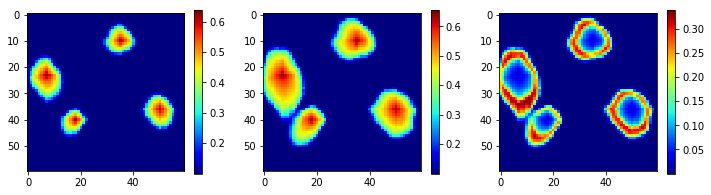

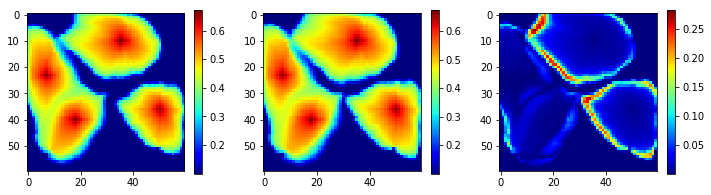

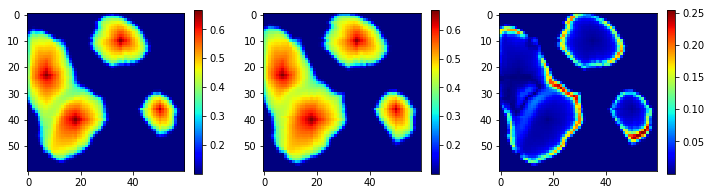

In [73]:
for k in range(3):
    plt.figure(figsize=(12,3))
    plt.subplot(1,3,1)
    plt.imshow(state_t_train[k, :,:,0])
    plt.colorbar()
    plt.subplot(1,3,2)
    plt.imshow(state_t1_train[k, :,:,0])
    plt.colorbar()
    plt.subplot(1,3,3)
    plt.imshow(np.fabs(state_t1_train[k, :,:,0] - state_t_train[k,:,:,0]))
    plt.colorbar()
plt.show()

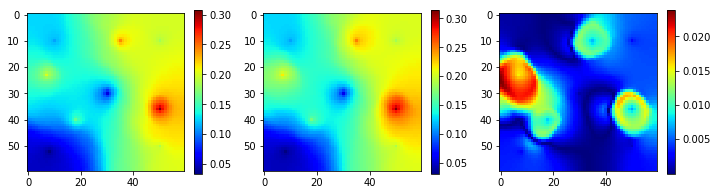

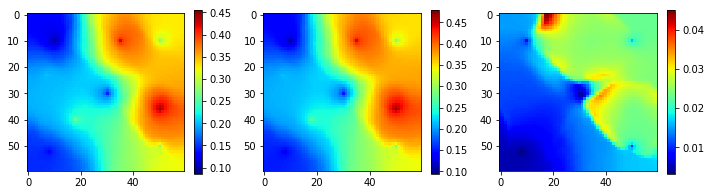

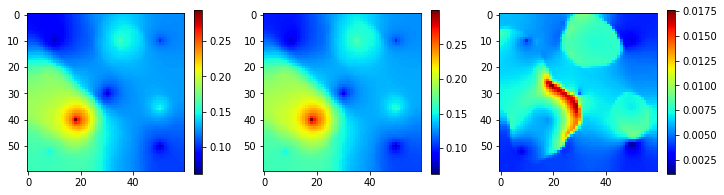

In [74]:
for k in range(3):
    plt.figure(figsize=(12,3))
    plt.subplot(1,3,1)
    plt.imshow(state_t_train[k, :,:,1])
    plt.colorbar()
    plt.subplot(1,3,2)
    plt.imshow(state_t1_train[k, :,:,1])
    plt.colorbar()
    plt.subplot(1,3,3)
    plt.imshow(np.fabs(state_t1_train[k, :,:,1] - state_t_train[k,:,:,1]))
    plt.colorbar()
plt.show()

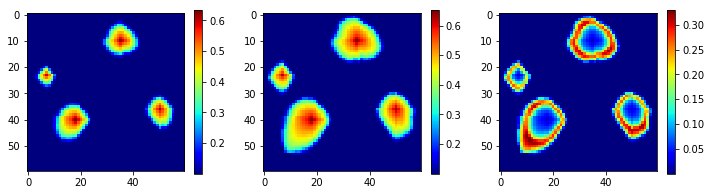

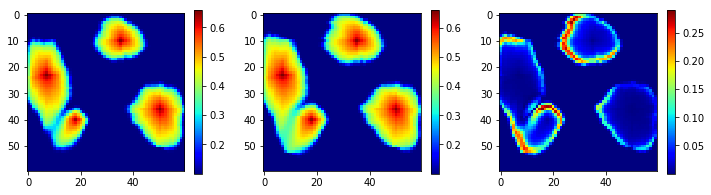

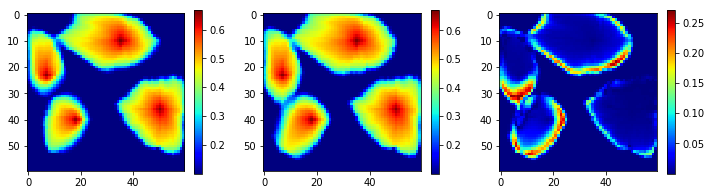

In [75]:
for k in range(3):
    plt.figure(figsize=(12,3))
    plt.subplot(1,3,1)
    plt.imshow(state_t_eval[k, :,:,0])
    plt.colorbar()
    plt.subplot(1,3,2)
    plt.imshow(state_t1_eval[k, :,:,0])
    plt.colorbar()
    plt.subplot(1,3,3)
    plt.imshow(np.fabs(state_t1_eval[k, :,:,0] - state_t_eval[k,:,:,0]))
    plt.colorbar()
plt.show()

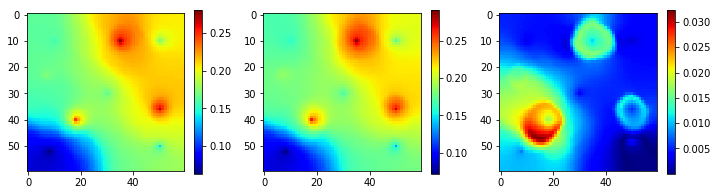

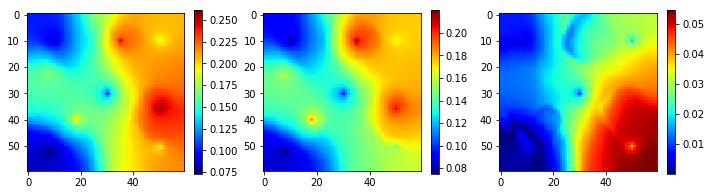

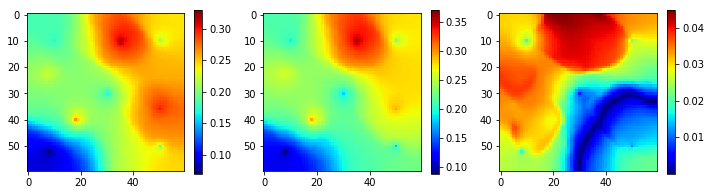

In [76]:
for k in range(3):
    plt.figure(figsize=(12,3))
    plt.subplot(1,3,1)
    plt.imshow(state_t_eval[k, :,:,1])
    plt.colorbar()
    plt.subplot(1,3,2)
    plt.imshow(state_t1_eval[k, :,:,1])
    plt.colorbar()
    plt.subplot(1,3,3)
    plt.imshow(np.fabs(state_t1_eval[k, :,:,1] - state_t_eval[k,:,:,1]))
    plt.colorbar()
plt.show()

In [77]:
hf_w = h5py.File(data_dir + case_name + '_e2c_train' + case_suffix + train_suffix+ '_n6900_dt20day_nt23_nrun300.mat', 'w')
hf_w.create_dataset('state_t', data=state_t_train)
hf_w.create_dataset('state_t1', data=state_t1_train)
hf_w.create_dataset('bhp', data = bhp_train)
hf_w.close()

In [78]:
bhp_eval.shape

(2200, 18)

In [79]:
hf_w = h5py.File(data_dir + case_name + '_e2c_eval' + case_suffix + train_suffix+'_n2300_dt20day_nt23_nrun100.mat', 'w')
hf_w.create_dataset('state_t', data=state_t_eval)
hf_w.create_dataset('state_t1', data=state_t1_eval)
hf_w.create_dataset('bhp', data = bhp_eval)
hf_w.close()